In [4]:
#@title installing ssm and scipy
!pip install ssm
!pip install scipy==1.2.3
!pip install fitter

     |████████████████████████████████| 317kB 2.8MB/s 
  Created wheel for ssm: filename=ssm-0.0.1-cp36-cp36m-linux_x86_64.whl size=678860 sha256=2b3c36c658fc966b5bd677bd7f8e67ccd201d147f3e6c99ebfa22653d70ce956
  Stored in directory: /root/.cache/pip/wheels/7a/26/7f/279606a509bdc1b2bd8659632f406e1c5a8fe58b733a28c791
Successfully built ssm
     |████████████████████████████████| 24.8MB 175kB/s 
ERROR: umap-learn 0.4.6 has requirement scipy>=1.3.1, but you'll have scipy 1.2.3 which is incompatible.
ERROR: tensorflow 2.2.0 has requirement scipy==1.4.1; python_version >= "3", but you'll have scipy 1.2.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Created wheel for fitter: filename=fitter-1.2.1-cp36-none-any.whl size=22008 sha256=6c1c1b4cfbfbd3701915a5412dbd8c1ddf5aa28702ef9edd6

In [5]:
#@title importing some modules
import autograd.numpy as np
import autograd.numpy.random as npr
npr.seed(0)
#scipy 1.2.3
#matplotlib 2.2.4

import ssm
from ssm.util import find_permutation

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style("white")
sns.set_context("talk")

color_names = [
    "windows blue",
    "red",
    "amber",
    "faded green",
    "dusty purple",
    "orange"
    ]

colors = sns.xkcd_palette(color_names)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
#@title importing scipy
import scipy
scipy.__version__

'1.2.3'

In [7]:
#@title importing more modules
import autograd.numpy as np
import autograd.numpy.random as npr
npr.seed(0)
#scipy 1.2.3
#matplotlib 2.2.4

import ssm
from ssm.util import find_permutation

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style("white")
sns.set_context("talk")

color_names = [
    "windows blue",
    "red",
    "amber",
    "faded green",
    "dusty purple",
    "orange"
    ]

colors = sns.xkcd_palette(color_names)

In [8]:
#@title some helpers for plotting 
"""
Helpers for generating colormaps
"""
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

def white_to_color_cmap(color, nsteps=256):
    # Get a red-white-black cmap
    cdict = {'red': ((0.0, 1.0, 1.0),
                       (1.0, color[0], color[0])),
                'green': ((0.0, 1.0, 1.0),
                          (1.0, color[1], color[0])),
                'blue': ((0.0, 1.0, 1.0),
                         (1.0, color[2], color[0]))}
    cmap = LinearSegmentedColormap('white_color_colormap', cdict, nsteps)
    return cmap

def gradient_cmap(colors, nsteps=256, bounds=None):
    # Make a colormap that interpolates between a set of colors
    ncolors = len(colors)
    # assert colors.shape[1] == 3
    if bounds is None:
        bounds = np.linspace(0,1,ncolors)


    reds = []
    greens = []
    blues = []
    alphas = []
    for b,c in zip(bounds, colors):
        reds.append((b, c[0], c[0]))
        greens.append((b, c[1], c[1]))
        blues.append((b, c[2], c[2]))
        alphas.append((b, c[3], c[3]) if len(c) == 4 else (b, 1., 1.))

    cdict = {'red': tuple(reds),
             'green': tuple(greens),
             'blue': tuple(blues),
             'alpha': tuple(alphas)}

    cmap = LinearSegmentedColormap('grad_colormap', cdict, nsteps)
    return cmap

def combo_white_to_color_cmap(colors, nsteps=1000):
    ncolors = colors.shape[0]
    # assert colors.shape[1] == 3
    bounds = np.linspace(0,1,ncolors+1)

    # Get a red-white-black cmap
    reds = [(0.0,1.0,1.0)]
    greens = [(0.0,1.0,1.0)]
    blues = [(0.0,1.0,1.0)]
    for i,b in enumerate(bounds):
        if i == 0:
            continue
        reds.append((b, colors[i-1][0], 1.0))
        greens.append((b, colors[i-1][1], 1.0))
        blues.append((b, colors[i-1][2], 1.0))

    cdict = {'red': tuple(reds),
             'green': tuple(greens),
             'blue': tuple(blues)}
    cmap = LinearSegmentedColormap('white_color_colormap', cdict, nsteps)
    return cmap

def harvard_colors():
    return [
        np.array([165,  28,  48]) / 255.0,    # 0.  crimson
        np.array([ 78, 132, 196]) / 255.0,    # 1.  blue bonnet
        np.array([ 82, 133,  76]) / 255.0,    # 2.  ivy
        np.array([196, 150,  26]) / 255.0,    # 3.  gold
        np.array([  0, 156, 163]) / 255.0,    # 4.  aqua
        np.array([232, 125,  30]) / 255.0,    # 5.  saffron
        np.array([137, 150, 160]) / 255.0,    # 6.  slate
        np.array([ 41,  51,  82]) / 255.0,    # 7.  indigo
        np.array([195, 215, 164]) / 255.0,    # 8.  pear
        np.array([255, 219, 109]) / 255.0,    # 9.  lemon
        np.array([ 43,  13,  97]) / 255.0,    # 10. dark purple
    ]

cmap = gradient_cmap(colors)

from matplotlib import rcParams 
rcParams['figure.figsize'] = [20, 4]
rcParams['font.size'] =15
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['figure.autolayout'] = True

In [9]:
#@title Data retrieval
import os, requests

fname = "stringer_spontaneous.npy"
url = "https://osf.io/dpqaj/download"
fname2 = "stringer_orientations.npy"
url2 = "https://osf.io/ny4ut/download"


if not os.path.isfile(fname):
  try:
    r = requests.get(url)
  except requests.ConnectionError:
    print("!!! Failed to download data !!!")
  else:
    if r.status_code != requests.codes.ok:
      print("!!! Failed to download data !!!")
    else:
      with open(fname, "wb") as fid:
        fid.write(r.content) 

if not os.path.isfile(fname2):
  try:
    r = requests.get(url2)
  except requests.ConnectionError:
    print("!!! Failed to download data !!!")
  else:
    if r.status_code != requests.codes.ok:
      print("!!! Failed to download data !!!")
    else:
      with open(fname2, "wb") as fid:
        fid.write(r.content) 



In [10]:
#@title Data loading
dat = np.load('stringer_spontaneous.npy', allow_pickle=True).item()
#dat2 = np.load('stringer_orientations.npy', allow_pickle=True).item()

In [13]:
print(dat['sresp'].shape)
print(dat.keys())

(11983, 7018)
dict_keys(['sresp', 'run', 'beh_svd_time', 'beh_svd_mask', 'stat', 'pupilArea', 'pupilCOM', 'xyz'])


[Text(0, 0.5, 'C'), Text(0.5, 0, 'timepoints')]

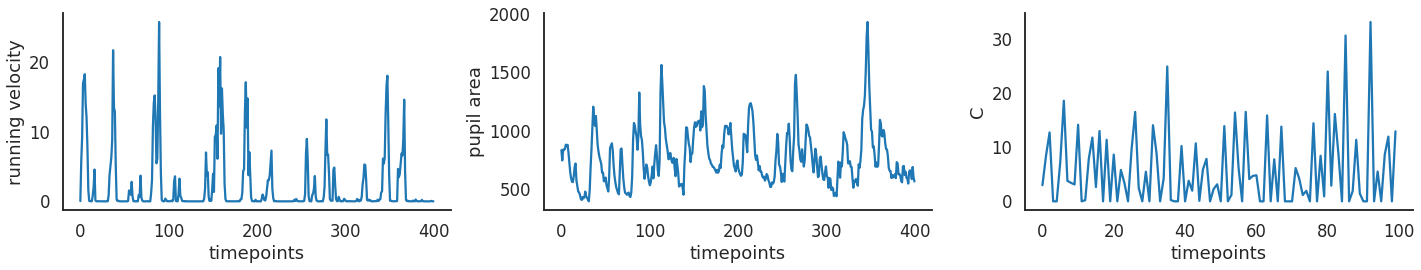

In [14]:
#@title Basic properties of behavioral data using plot and scatter
ax = plt.subplot(131)
plt.plot(dat["run"][:400])
ax.set(xlabel='timepoints', ylabel = 'running velocity')

ax = plt.subplot(132)
plt.plot(dat['pupilArea'][:400,0])
ax.set(xlabel='timepoints', ylabel = 'pupil area')

ax = plt.subplot(133)
plt.plot(dat['sresp'][0,:100])
ax.set(xlabel='timepoints', ylabel = 'C')

[Text(987.2898149507671, 0.5, 'C'),
 Text(0.5, 25.200000000000003, 'timepoints')]

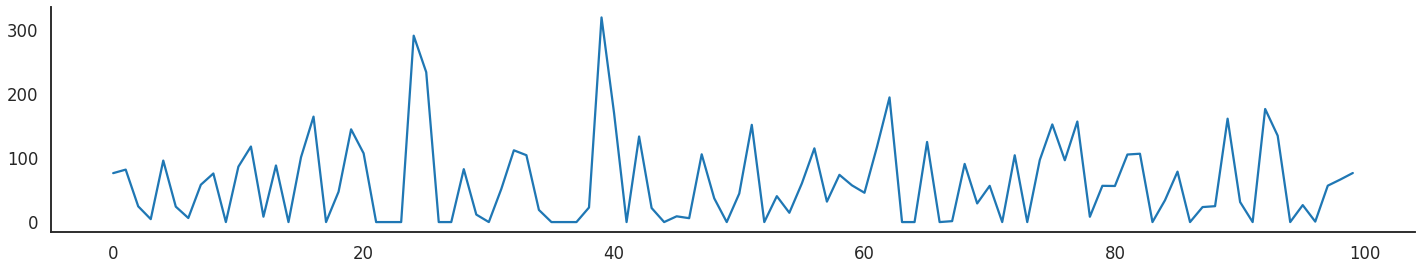

In [15]:
plt.plot(dat['sresp'][90,500:600])
ax.set(xlabel='timepoints', ylabel = 'C')

2073
7018


(0.0, 30.0)

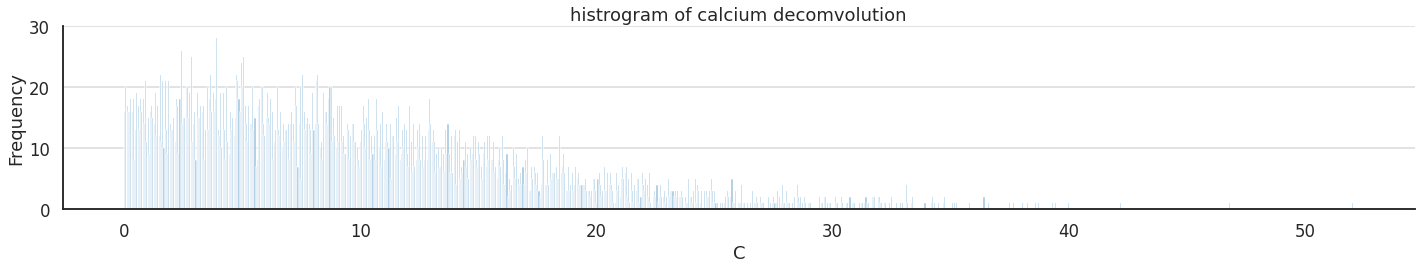

In [16]:
# An "interface" to matplotlib.axes.Axes.hist() method
neu0 = dat["sresp"][0,:]
print (len (neu0[neu0 == 0]))
print (len (neu0))
n, bins, patches = plt.hist(x=neu0 [neu0 != 0], bins=1000,
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('C')
#plt.xlim(0, 10)
plt.ylabel('Frequency')
plt.title('histrogram of calcium decomvolution')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

In [ ]:
scipy.stats.chisquare(f_obs, f_exp=None, ddof=0, axis=0)

In [34]:
from fitter import Fitter
from fitter import get_distributions
get_distributions()
#f = Fitter(neu0 [neu0 != 0])
#f.fit()
# may take some time since by default, all distributions are tried
# but you call manually provide a smaller set of distributions
#f.summary()

['alpha',
 'anglit',
 'arcsine',
 'argus',
 'beta',
 'betaprime',
 'bradford',
 'burr',
 'burr12',
 'cauchy',
 'chi',
 'chi2',
 'cosine',
 'crystalball',
 'dgamma',
 'dweibull',
 'erlang',
 'expon',
 'exponnorm',
 'exponpow',
 'exponweib',
 'f',
 'fatiguelife',
 'fisk',
 'foldcauchy',
 'foldnorm',
 'frechet_l',
 'frechet_r',
 'gamma',
 'gausshyper',
 'genexpon',
 'genextreme',
 'gengamma',
 'genhalflogistic',
 'genlogistic',
 'gennorm',
 'genpareto',
 'gilbrat',
 'gompertz',
 'gumbel_l',
 'gumbel_r',
 'halfcauchy',
 'halfgennorm',
 'halflogistic',
 'halfnorm',
 'hypsecant',
 'invgamma',
 'invgauss',
 'invweibull',
 'johnsonsb',
 'johnsonsu',
 'kappa3',
 'kappa4',
 'ksone',
 'kstwobign',
 'laplace',
 'levy',
 'levy_l',
 'levy_stable',
 'loggamma',
 'logistic',
 'loglaplace',
 'lognorm',
 'lomax',
 'maxwell',
 'mielke',
 'moyal',
 'nakagami',
 'ncf',
 'nct',
 'ncx2',
 'norm',
 'norminvgauss',
 'pareto',
 'pearson3',
 'powerlaw',
 'powerlognorm',
 'powernorm',
 'rayleigh',
 'rdist',
 'rec

In [ ]:
#@title take PCA after preparing data by z-score
from scipy.stats import zscore
from sklearn.decomposition import PCA 
Z = zscore(dat['sresp'], axis=1)
Z = np.nan_to_num(Z)
X = PCA(n_components = 200).fit_transform(Z)

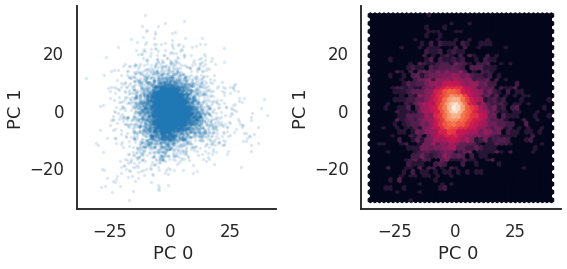

In [ ]:
#@title Plot PCs. Too many points, switch to logarithmic hexbin! 
ax = plt.subplot(1,5,1)
plt.scatter(X[:,3], X[:,4], s = 4, alpha = .1)
ax.set(xlabel = 'PC 0 ', ylabel = 'PC 1');

ax = plt.subplot(1,5,2)
plt.hexbin(X[:,3], X[:,4], gridsize = 40, bins = 'log')
ax.set(xlabel = 'PC 0 ', ylabel = 'PC 1', alpha = .1);

In [17]:
dat_C = dat["sresp"].T[:900,:600]
print (dat_C.shape)

(900, 600)


2 states--->
1: baseline
2:  running

In [29]:
num_states = 3    # number of discrete states
obs_dim = dat_C.shape[1]       # dimensionality of observation

# Make an HMM
simple_hmm = ssm.HMM(num_states, obs_dim, observations="ar", transitions="standard")

lls = simple_hmm.fit(dat_C, method='em', num_em_iters=20)

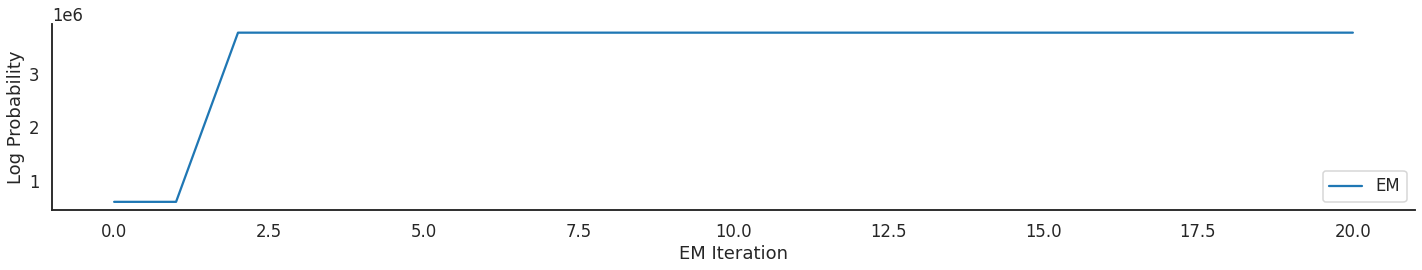

In [30]:
plt.plot(lls, label="EM")
plt.xlabel("EM Iteration")
plt.ylabel("Log Probability")
plt.legend(loc="lower right")
plt.show()

In [31]:
most_likely_states = simple_hmm.most_likely_states(dat_C)

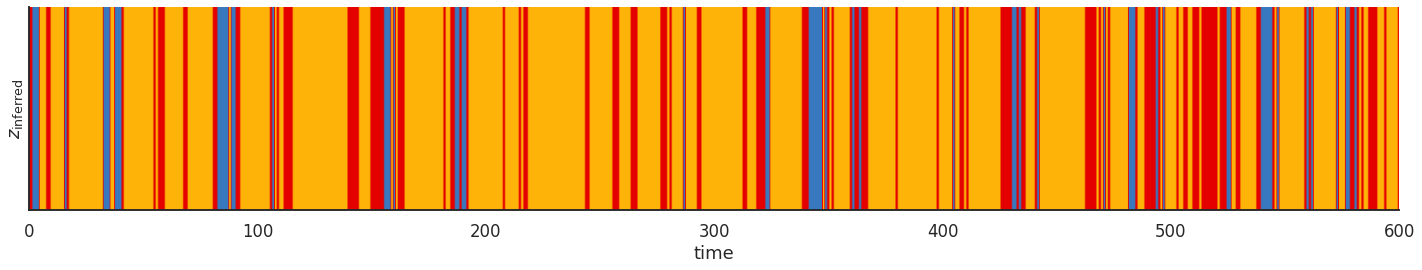

In [32]:
plt.imshow(most_likely_states[None,:], aspect="auto", cmap=cmap, vmin=0, vmax=len(colors)-1)
plt.xlim(0, 600 ) #dat_C.shape[0]
plt.ylabel("$z_{\\mathrm{inferred}}$")
plt.yticks([])
plt.xlabel("time")

plt.tight_layout()



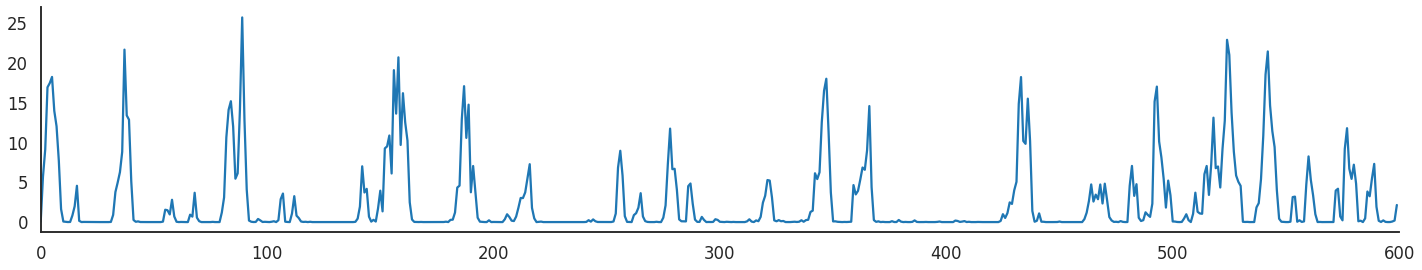

In [33]:
plt.plot(dat["run"][:600])
plt.xlim(0, 600 )
plt.show()

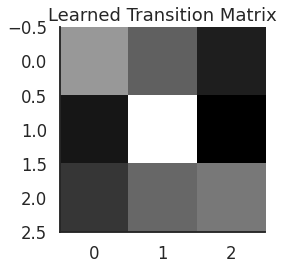

In [ ]:
learned_transition_mat = simple_hmm.transitions.transition_matrix

im = plt.imshow(learned_transition_mat, cmap='gray')
plt.title("Learned Transition Matrix")
#plt.colorbar(im, cax=cbar_ax)
plt.show()